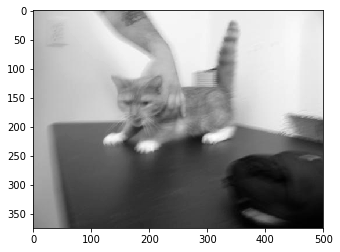

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2

DATADIR = "D:\Artificial Intelligence\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats and dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break # try to only show 1 grayscale pic of cat/dog
    break

In [4]:
print(img_array) # array representation , pixel values of image

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


In [5]:
print(img_array.shape) # images have different shapes

(375, 500)


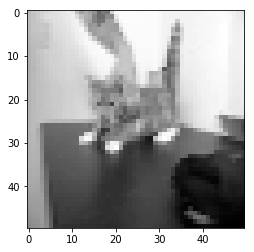

In [6]:
# defining fixed shape of image to normalize it 

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = [] #place for training data 

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats and dogs dir
        class_num = CATEGORIES.index(category) # for labelling, cat as 0 and dog as 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
            

In [8]:
print(len(training_data))

24946


In [9]:
# shuffling the datasets to avoid bias 

import random

random.shuffle(training_data)

In [10]:
# proof that dataset is shuffled

for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
1
0
0


In [11]:
X = [] # feature
y = [] # label

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 because grayscale , 3 if colored 


In [13]:
#saving the training data  

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
# try read the saved data

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
X[1] 

array([[[116],
        [116],
        [113],
        ...,
        [126],
        [126],
        [120]],

       [[118],
        [116],
        [113],
        ...,
        [130],
        [124],
        [122]],

       [[118],
        [116],
        [114],
        ...,
        [135],
        [137],
        [114]],

       ...,

       [[ 74],
        [ 75],
        [ 66],
        ...,
        [ 45],
        [ 51],
        [ 48]],

       [[ 50],
        [ 60],
        [ 67],
        ...,
        [ 55],
        [ 50],
        [ 49]],

       [[ 79],
        [ 68],
        [ 67],
        ...,
        [ 55],
        [ 54],
        [ 49]]], dtype=uint8)